**B221910007 Г. Тэмүүлэн**

**Лабораторын ажил 8: Ties Strength & Resilience**

Энэ долоо хоногийн лабораторын ажлаар бид графын мөрмөг буюу холбоосын гол хэмжүүрүүд болох холбоосын чадал болон сүлжээний уян хатан байдлын талаар судлах, кодчилох болно.

Note: Уг нотебүүк нь 100 хувь болон гүйцэт биш бөгөөд цаашид нэмэн судлахад шаардлагатай зөвхөн анхан шатны ойлголтуудыг багтаасан болно.

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Өмнөх долоо хоногт ашигласан Game of Thrones датасетын Season 6-ийн мөрмөгийн өгөгдлийг ашиглан граф g байгуулъя. (useful for further operations)

In [ ]:
import networkx as nx

def read_net_w(filename):
    g = nx.Graph()
    with open(filename) as f:
        next(f, None)  # Толгойн мөрийг хасна
        for line in f:
            line = line.strip().split(",")  # Мөрийг коммоор тусгаарлана
            try:
                source = line[0].strip()
                target = line[1].strip()
                weight = int(line[4].strip())  # Жинг 5-р баганад (индекс 4) гэж үзнэ
                g.add_edge(source, target, weight=weight)
            except (ValueError, IndexError) as e:
                print(f"Мөрийг хасаж байна: {line}. Алдаа: {e}")
    return g

# Жишээ хэрэглээ
season = 6
g = read_net_w('../data/asoiaf-all-edges.csv')  # Таны жинхэнэ файлын замыг оруулна уу

**Bridges and Local Bridges**

Граф дотор bridge мөрмөгүүд байгаа эсэхийг шалгахдаа дараах функцийг ашиглана.

In [ ]:
nx.has_bridges(g)

True

Граф дахь бүх bridge-ийг жагсаалт байдлаар хэвлэхдээ —

In [ ]:
list(nx.bridges(g))

[('Cersei-Lannister', 'Garth-Tyrell'),
 ('Cersei-Lannister', 'Mark-Mullendore'),
 ('Cersei-Lannister', 'Raynard'),
 ('Jaime-Lannister', 'Aemon-Targaryen-(Dragonknight)'),
 ('Jaime-Lannister', 'Bonifer-Hasty'),
 ('Jaime-Lannister', 'Garrett-Paege'),
 ('Jaime-Lannister', 'Hoster-Blackwood'),
 ('Jaime-Lannister', 'Hugo-Vance'),
 ('Jaime-Lannister', 'Joy-Hill'),
 ('Jaime-Lannister', 'Lewys-Piper'),
 ('Jaime-Lannister', 'Rennifer-Longwaters'),
 ('Jaime-Lannister', 'Shitmouth'),
 ('Jaime-Lannister', 'Urswyck'),
 ('Joffrey-Baratheon', 'Horas-Redwyne'),
 ('Tyrion-Lannister', 'Chataya'),
 ('Tyrion-Lannister', 'Galyeon-of-Cuy'),
 ('Tyrion-Lannister', 'Gunthor-son-of-Gurn'),
 ('Tyrion-Lannister', 'Kurleket'),
 ('Tyrion-Lannister', 'Leo-Lefford'),
 ('Tyrion-Lannister', 'Mord'),
 ('Tyrion-Lannister', 'Morgo'),
 ('Tyrion-Lannister', 'Shrouded-Lord'),
 ('Tywin-Lannister', 'Joanna-Lannister'),
 ('Catelyn-Stark', 'Brenett'),
 ('Catelyn-Stark', 'Donnel-Waynwood'),
 ('Catelyn-Stark', 'Masha-Heddle'),
 ('

Харин тухайн граф дахь local bridge-уудыг хэвлэх болон span бодохдоо (i.e., the shortest path length between the endpoints if the local bridge is removed)

In [ ]:
list(nx.local_bridges(g, with_span=True))

[('Cersei-Lannister', 'Garth-Tyrell', inf),
 ('Cersei-Lannister', 'Mark-Mullendore', inf),
 ('Cersei-Lannister', 'Raynard', inf),
 ('Jaime-Lannister', 'Aemon-Targaryen-(Dragonknight)', inf),
 ('Jaime-Lannister', 'Bonifer-Hasty', inf),
 ('Jaime-Lannister', 'Garrett-Paege', inf),
 ('Jaime-Lannister', 'Hoster-Blackwood', inf),
 ('Jaime-Lannister', 'Hugo-Vance', inf),
 ('Jaime-Lannister', 'Joy-Hill', inf),
 ('Jaime-Lannister', 'Lewys-Piper', inf),
 ('Jaime-Lannister', 'Rennifer-Longwaters', inf),
 ('Jaime-Lannister', 'Shadrich', 3),
 ('Jaime-Lannister', 'Shitmouth', inf),
 ('Jaime-Lannister', 'Urswyck', inf),
 ('Joffrey-Baratheon', 'Horas-Redwyne', inf),
 ('Kevan-Lannister', 'Willem-Lannister', 3),
 ('Oberyn-Martell', 'Anders-Yronwood', 3),
 ('Tyrion-Lannister', 'Chataya', inf),
 ('Tyrion-Lannister', 'Galyeon-of-Cuy', inf),
 ('Tyrion-Lannister', 'Gunthor-son-of-Gurn', inf),
 ('Tyrion-Lannister', 'Kurleket', inf),
 ('Tyrion-Lannister', 'Leo-Lefford', inf),
 ('Tyrion-Lannister', 'Mord', inf)

**Tie Strength - Холбоосын чадал**


Графан байх боломжит бүх хос оройнуудын хувьд холбоосын чадлыг Neighborhood Overlap-аар бодохоор дараах функцийг хэрэгжүүлэв.

In [ ]:
def calculate_neighborhood_overlap(g):
    for u, v in g.edges():  # Сүлжээн дэх бүх холболтыг шалгана
        neighbors_u = set(g.neighbors(u))  # Узел u-ийн хөршүүд
        neighbors_v = set(g.neighbors(v))  # Узел v-ийн хөршүүд
        intersection = len(neighbors_u & neighbors_v)  # Хуваалцсан хөршүүд
        union = len(neighbors_u | neighbors_v)  # Нийт өвөрмөц хөршүүд
        overlap = intersection / union if union != 0 else 0  # Хуваалцсан хөршүүдийн харьцаа (тэгшитгэлээс зайлсхийж)
        g[u][v]['overlap'] = overlap  # Холболтод overlap шинж чанарыг нэмэх
    return g

# Таны графикт neighborhood overlap-ыг тооцоолно
g = calculate_neighborhood_overlap(g)

Хэрэглэгчийн ойр орчны давхцалын KDE (Кернелийн Нягтралын Төсөөлөл)-г зураглах  

Plotting the KDE (Kernel Density Estimation) of Neighborhood Overlap

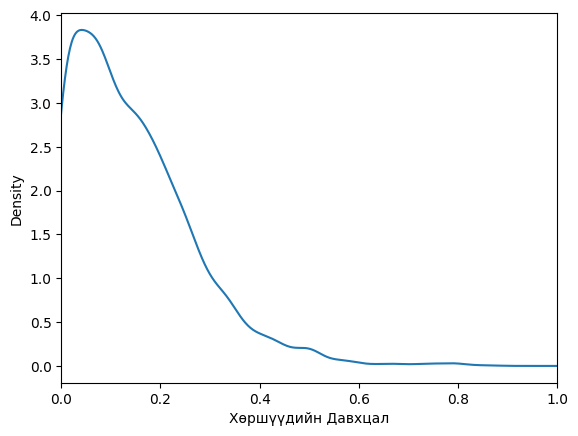

In [ ]:
# Графикаас давхцлын жингүүдийг гаргаж авах
weights = [e[2]['overlap'] for e in g.edges(data=True)]  # e[2] нь холболтын шинж чанаруудыг агуулна

# DataFrame үүсгэж, KDE-г зураглах
pd.DataFrame(weights)[0].plot.kde()
plt.xlabel("Хөршүүдийн Давхцал")
plt.xlim(0, 1)  # Хөршүүдийн Давхцал нь 0 болон 1-ийн хооронд байх
plt.show()

Харилцан үйлдлийн жингийн KDE (Кернелийн Нягтралын Төсөөлөл)-г зураглах

Plotting the KDE (Kernel Density Estimation) of Interactions Weights

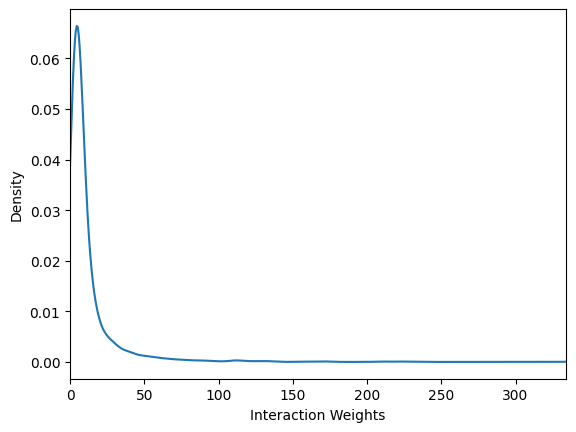

In [ ]:
weights_got = [d['weight'] for u,v,d in g.edges(data=True)]
pd.DataFrame(weights_got)[0].plot.kde()
plt.xlabel("Interaction Weights")
plt.xlim(0,max(weights_got))
plt.show()

**Сүлжээний Тогтворт байдал**


Дараах үйлдлүүдийг гүйцэтгэнэ:

  - Санамсаргүй болон Масштабын чөлөөт сүлжээ үүсгэнэ

  - Аль алинд нь Сүлжээний Тогтворт байдал тооцоолно (molloy_reed болон breakdown_threshold ашиглан)

  - Game of Thrones графикийг Санамсаргүй Алдаа ба Тодорхой Хүрэлтийг доройтуулан зургаар үзүүлнэ

In [ ]:
# Random
er = nx.erdos_renyi_graph(1000, 0.001)
# Scale-free
ba = nx.barabasi_albert_graph(1000, 2)

ER and BA графуудын хувьд оройн зэрэглэлийг тодорхойлбол

In [ ]:
er_degs = list(dict(er.degree()).values())
ba_degs = list(dict(ba.degree()).values())

Molloy-Reed threshold тодорхойлох

In [ ]:
def molloy_reed(degrees):
    return (np.mean(degrees)*(np.mean(degrees)+1))/np.mean(degrees)

def breakdown_threshold(degrees):
    K = molloy_reed(degrees)
    return 1 - (1/(K-1))

Random network

In [ ]:
molloy_reed(er_degs)

np.float64(2.026)

In [ ]:
breakdown_threshold(er_degs)

np.float64(0.02534113060428833)

Scale-free network

In [ ]:
molloy_reed(ba_degs)

np.float64(4.992)

In [ ]:
breakdown_threshold(ba_degs)

np.float64(0.7494989979959921)

**Random Failures**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from scripts.dismantle_utils import random_node, dismantle, get_sorted_nodes, plot_dismantle
from scripts.load_and_build_graph import read_net

# 📂 Файлаа ачааллах
edge_file = "data/asoiaf-all-edges.csv"
node_file = "data/asoiaf-all-nodes.csv"
G = read_net(edge_file)

# 🧠 Node attribute нэмэх
with open(node_file, encoding="utf-8") as f:
    f.readline()
    for line in f:
        parts = line.strip().split(",")
        if len(parts) >= 3:
            node, _, house = parts
            G.add_node(node, house=house)

# 🔍 Санамсаргүй узел устгах
x_rand, y_rand = dismantle(G, random_node)

# 🔍 Degree төвшингөөр эрэмбэлсэн узелүүд устгах
def top_degree(g):
    return get_sorted_nodes(g, nx.degree_centrality)

x_deg, y_deg = dismantle(G, top_degree)

# 📊 Графикаар харуулах
plt.figure(figsize=(8, 5))
plot_dismantle(x_rand, y_rand)
plot_dismantle(x_deg, y_deg)
plt.legend(["Санамсаргүй", "Degree Centrality"])

**Random Failure:**

  - Их хэмжээний бүрэлдэхүүн хэсгийн хэмжээ нь том хэсэг узлуудыг устгасан үед тогтмол буурах хандлагатай байдаг.

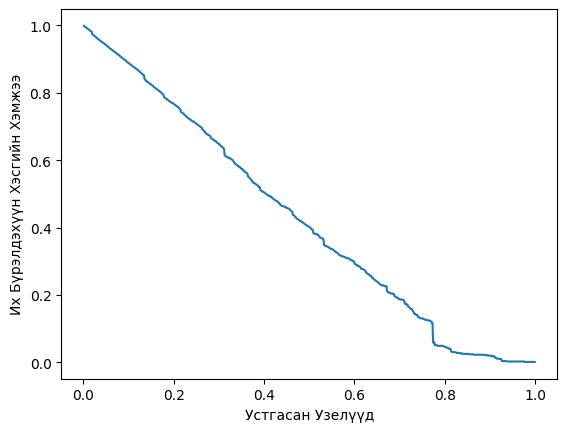

In [ ]:
h = g.copy()
nn, comps = dismantle(h, random_node)
plot_dismantle(nn, comps)

**Targeted Attacks**

Тодорхой Узлын халдлага (эхлээд төвлөрсөн узлууд устгагдана)

  - Их хэмжээний бүрэлдэхүүн хэсгийн хэмжээ нь товчхон хэсэг узлуудыг устгасан үед тогтмол буурах хандлагатай байдаг.

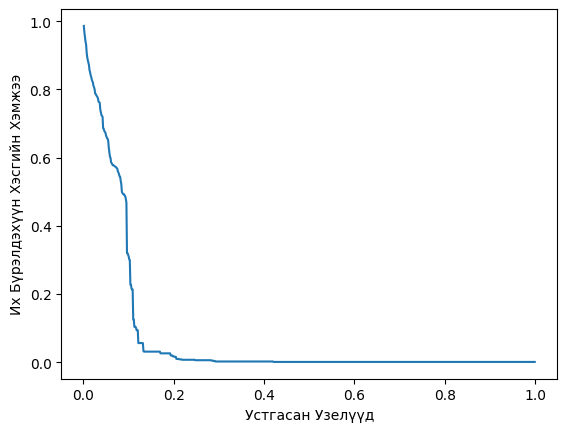

In [ ]:
h = g.copy()
rn, comps = dismantle(h, get_sorted_nodes, score=nx.degree)
plot_dismantle(rn, comps)

Тодорхой Гадна Үйлдлийн Хорио (Edge Betweenness Centrality дээр үндэслэсэн)

  - Их хэмжээний бүрэлдэхүүн хэсгийн хэмжээ нь товчхон хэсэг узлуудыг устгасан үед тогтмол буурах хандлагатай байдаг.

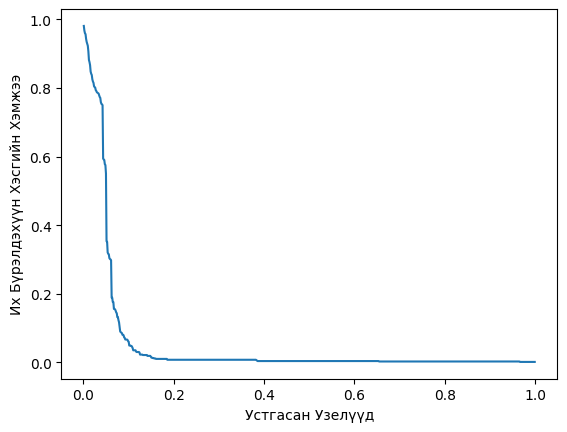

In [ ]:
h = g.copy()
rn, comps = dismantle(h, get_sorted_nodes, score=nx.betweenness_centrality)
plot_dismantle(rn, comps)

Тодорхой Гадна Үйлдлийн Хорио (Edge Harmonic Centrality дээр үндэслэсэн)

  - Их хэмжээний бүрэлдэхүүн хэсгийн хэмжээ нь товчхон хэсэг узлуудыг устгасан үед тогтмол буурах хандлагатай байдаг.

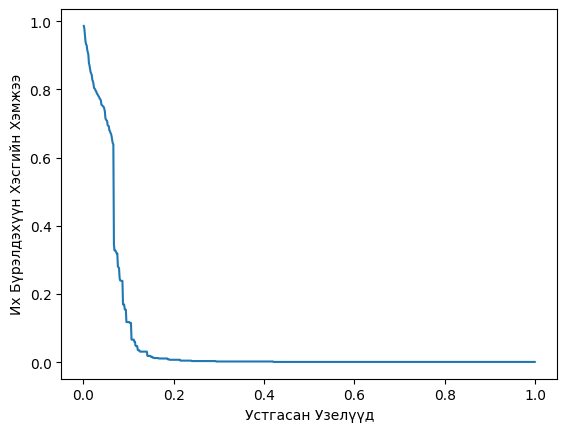

In [ ]:
h = g.copy()
rn, comps = dismantle(h, get_sorted_nodes, score=nx.harmonic_centrality)
plot_dismantle(rn, comps)